###  Handwritten digits classification using neural network
In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves


<img src="images/digits_nn.jpg" style="width:750px;height:500px;">


In [6]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [7]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [8]:
len(X_train)

60000

In [9]:
len(X_test)

10000

In [10]:
X_train[0].shape

(28, 28)

In [11]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

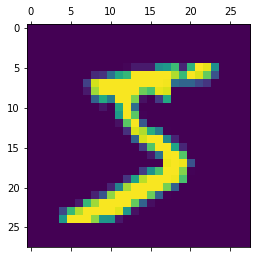

In [12]:
plt.matshow(X_train[0])

In [13]:
y_train[0]

5

In [14]:
X_train = X_train / 255
X_test = X_test / 255

In [15]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [16]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [17]:
X_train_flattened.shape

(60000, 784)

In [18]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [19]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.4906 - acc: 0.8764
Epoch 2/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3066 - acc: 0.9157
Epoch 3/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2860 - acc: 0.9209
Epoch 4/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2754 - acc: 0.9241
Epoch 5/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2680 - acc: 0.9258


In [20]:
model.evaluate(X_test_flattened, y_test)

10000/10000 [==============================] - 0s 43us/sample - loss: 0.2685 - acc: 0.9254


[0.2684975407600403, 0.9254]

In [21]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([1.6570091e-05, 0.0000000e+00, 2.8908253e-05, 1.3007730e-02,
       9.2387199e-07, 5.4389238e-05, 0.0000000e+00, 7.2496837e-01,
       8.1032515e-05, 1.0951161e-03], dtype=float32)

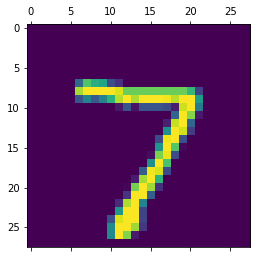

In [22]:
plt.matshow(X_test[0])

In [23]:
np.argmax(y_predicted[0])

7

In [24]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [25]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

## Using hidden layer

In [30]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2933 - acc: 0.9173
Epoch 2/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.1400 - acc: 0.9592
Epoch 3/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0995 - acc: 0.9705
Epoch 4/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0775 - acc: 0.9765
Epoch 5/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0614 - acc: 0.9809


In [31]:
model.evaluate(X_test_flattened,y_test)

10000/10000 [==============================] - 1s 87us/sample - loss: 0.0931 - acc: 0.9712


[0.09311645935631822, 0.9712]

### Using Flatten layer so that we don't have to call .reshape on input dataset

In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2851 - acc: 0.9223
Epoch 2/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1296 - acc: 0.9620
Epoch 3/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0939 - acc: 0.9714
Epoch 4/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0711 - acc: 0.9788
Epoch 5/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0577 - acc: 0.9819
Epoch 6/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0470 - acc: 0.9855
Epoch 7/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.0388 - acc: 0.9882
Epoch 8/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0319 - acc: 0.9907
Epoch 9/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0271 - acc: 0.9919
Epoch 10/10
60000/60000 [==============================] - 5s 81us/sample - loss: 

In [33]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 51us/sample - loss: 0.0830 - acc: 0.9756


[0.08300045899330871, 0.9756]

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
